In [1]:
import os

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
from src.utils import simple_process_item, clean_phone_number, clean_bithdate

[nltk_data] Downloading package stopwords to /home/varsey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from collections import Counter

In [6]:
df_1 = pd.read_csv(f'{os.getcwd()}/data/main1.csv')
df_2 = pd.read_csv(f'{os.getcwd()}/data/main2.csv')
df_3 = pd.read_csv(f'{os.getcwd()}/data/main3.csv')

In [7]:
df_2.shape

(9366907, 7)

In [8]:
df_2['sex'] = ''
df_2['email'] = ''
df_2['full_name'] = df_2['first_name'] + ' ' + df_2['middle_name'] + ' ' + df_2['last_name'] 

In [9]:
df_3['address'] = ''
df_3['phone'] = ''
df_3 = df_3.rename(columns={'name': 'full_name'}) 

In [16]:
df_1['source'] = 1
df_2['source'] = 2
df_3['source'] = 3

In [17]:
df_1.head(1)

,uid,full_name,email,address,sex,birthdate,phone,source
0,8357db00-b4ce-4c33-a66e-1842744d0ce4,БАЛКИБАЕВ Углы МАМАСАИД КАРЛИТО,mamasaid_balkibaev0@example.ru,"г. Урус-Мартан, пер. Шмидта, д. 233 к. 6/4, 63...",m,1954-06-15,8 (020) 645-0526,1


In [18]:
df_2.head(1)

,uid,first_name,middle_name,last_name,birthdate,phone,address,sex,email,full_name,source
0,fd0eb198-eeef-4ff9-a983-26dd9aebb084,МАМАСАИД,КАРЛИТО,БAЛKИБАEВ,1954-06-15,8 (020) 6450526,"г. Урус-Мартан, пер. Шмидта, д. 233 к. 6/4, 63...",,,МАМАСАИД КАРЛИТО БAЛKИБАEВ,2


In [19]:
df_3.head(1)

,uid,full_name,email,birthdate,sex,address,phone,source
0,9185f879-6289-4ad6-9cb0-ed7cb6cb652b,МАМАСАИД ЬАДКИБАЕВ,mamasaid_balkibaev0@example.ru,9145-06-15,m,,,3


In [20]:
target_cols = ['uid', 'birthdate', 'phone', 'address', 'sex', 'email', 'full_name', 'source']

In [21]:
df_overall = pd.concat([df_1[target_cols], df_2[target_cols], df_3[target_cols]], axis='rows')

In [22]:
df_overall.to_parquet('df_overall.parquet')

In [6]:
df_overall = pd.read_parquet('df_overall.parquet')

In [7]:
df_overall.sample()

,uid,birthdate,phone,address,sex,email,full_name,source
4054181,a07c085d-f0f5-418a-93e5-8ff24efcc70b,81-06-02,+7 (903) 295-80-10,"ст. Чусовой, пр. Сенной, д. 951 к. 9, 622789",f,adnaris_boland4692411@mail.ru,БОЛАНД АДНАРИС ВЛАДИМИРОВНА,1


In [9]:
df_overall['full_name'] = df_overall['full_name'].apply(lambda x: simple_process_item(x, ['нет', 'отсутствует', 'углы', 'угли', 'оглы', 'огли']))

In [10]:
df_overall['email'] = df_overall['email'].apply(lambda x: ''.join(str(x).split('@')[0]))

df_overall['phone'] = df_overall['phone'].apply(clean_phone_number)

df_overall['birthdate'] = df_overall['birthdate'].apply(clean_bithdate)

In [11]:
df_overall['address'] = df_overall['address'].apply(lambda x: simple_process_item(x, ['квартира','строение','шоссе','улица','булица', 'село', 'город', 'поселок', 'деревня']))

In [12]:
df_overall.sample(5)

,uid,birthdate,phone,address,sex,email,full_name,source
8307127,e9a7c194-29bb-4634-94c9-a773c8754617,1972,7996704243,шоссп иркутское стронние,m,ermek_alrefaje96147z6mail.ru,вльрефайе рмек владиславович,1
602922,b30bb497-7bbd-4f46-814f-84eda18c34f1,1996 01 25,72656824276,лазаревское кошевого,,,гулмамвд пaскуадь паскуаль пмтервон,2
4831180,0e8326ea-5d22-41a3-8f79-44c0290e629c,1962 07 22,43230,нефтекамск тюленина,f,zhu_abdurahmanova5589875,абдурахманова игорьевна,1
1545420,ef0bd83b-7040-4a99-9993-d45a23f265d7,2003 01 01,77224469116,элиста толстого,f,marija_gvinn1788380,гвинн мария абибуллаевна,1
8248169,79a32edc-c150-42b8-b05a-b3da0f459a38,1998 04 04,83787511006,заводоуковск бульварный,,,санаьбек чандра сафаров,2


In [13]:
df_overall['sign'] = df_overall['full_name'] + ' ' + df_overall['phone'] + ' ' + df_overall['birthdate'] + ' ' + df_overall['address']

In [ ]:
# df_overall.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

In [16]:
df_overall = df_overall[['uid', 'sign', 'source']]

In [17]:
df_overall.sample(5)

,uid,sign,source
2385967,5f1e5e34-564e-4c9d-89ae-f9ed48862a29,светлана валентиновна валентиновна кольонен 92...,2
924228,bef157e3-b5dd-4bdc-9d4f-4f2aa15209fe,сукран вонг 1957 07 03,3
1577742,97f93551-2ff0-4187-88a9-d3eb947cf184,мухаммадали perestov 1987 02 19,3
7182256,2d4c91b9-57ac-4786-90a8-5618a82b3937,петра эшонова 957 01 01,3
6475788,78006dd5-5ace-4118-b7bb-6636915d8b1d,муроджон чунихин 1983 07 28,3


In [18]:
# df_3['full_name'] = df_3['name'].apply(lambda x: simple_process_item(x, []))

In [20]:
Counter(" ".join(df_overall.sample(5000).sign).split()).most_common(50)

[('01', 1284),
 ('05', 504),
 ('09', 503),
 ('04', 499),
 ('06', 496),
 ('07', 482),
 ('08', 481),
 ('12', 479),
 ('10', 477),
 ('03', 472),
 ('02', 447),
 ('11', 446),
 ('23', 159),
 ('17', 156),
 ('19', 151),
 ('16', 150),
 ('28', 150),
 ('18', 149),
 ('30', 145),
 ('15', 140),
 ('25', 135),
 ('22', 129),
 ('13', 128),
 ('29', 128),
 ('14', 126),
 ('24', 124),
 ('21', 117),
 ('26', 114),
 ('27', 114),
 ('20', 114),
 ('31', 87),
 ('1994', 76),
 ('1998', 76),
 ('1959', 73),
 ('1967', 73),
 ('2004', 71),
 ('1947', 71),
 ('1970', 71),
 ('1969', 70),
 ('1957', 70),
 ('1951', 69),
 ('1955', 68),
 ('1961', 68),
 ('елена', 67),
 ('1975', 67),
 ('1989', 66),
 ('2001', 66),
 ('2000', 66),
 ('1948', 66),
 ('1973', 66)]

In [21]:
df_overall.shape

(28141171, 3)

In [22]:
df_overall['totalwords'] = df_overall['sign'].str.split().str.len()

/tmp/ipykernel_9272/2581865098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overall['totalwords'] = df_overall['sign'].str.split().str.len()


<Axes: >

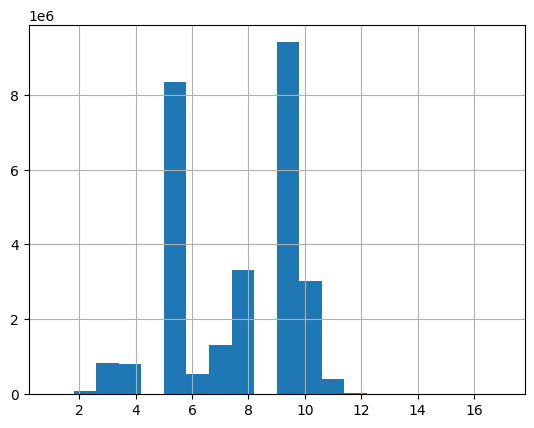

In [23]:
df_overall['totalwords'].hist(bins=20)

In [24]:
df_overall = df_overall[df_overall.totalwords > 4]

In [56]:
df_overall.shape

(26388167, 4)

In [57]:
df_overall.to_parquet('df_overall_cleaned.parquet')

In [ ]:
# PLEASE RUN run-on-cleaned.py SCRIPT NOW

In [ ]:
# DEMO IS NEXT

In [27]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_overall['sign'])


In [38]:
N = 5
counter = 0
for tstring in df_overall['sign'].sample(1000).to_list():
    counter += 1
    target = ' '.join(tstring.split()[:-2])
    target_tfidf = vectorizer.transform([target])
    cosine_similarities = cosine_similarity(target_tfidf, tfidf_matrix).flatten()
    closest_indices = np.argsort(cosine_similarities)[-N-1:-1][::-1]
    closest_strings = df_overall['sign'].iloc[closest_indices].tolist()
    sources = df_overall['source'].iloc[closest_indices].tolist()
    ids = df_overall['uid'].iloc[closest_indices].tolist()
    closest_scores = cosine_similarities[closest_indices]
    if any([(x > 0.6) for x in closest_scores]):
        print(f"Closest Strings to                                    {target}:")
        for string, score, source, uids in zip(closest_strings, closest_scores, sources, ids):
            if score > 0.6:
                print(f"Score: {score:.3f} {source} {uids}   {string}")
        print(counter)
        print()

Closest Strings to                                    нлдира филипповна бальдо 77687305725 1952 04:
Score: 0.697 1 68c31dc6-aff0-4dcd-9dee-2333779383ff   бальдо нодирa филипповна 77687305725 1952 04 12 саранск прохладная
3

Closest Strings to                                    вязникова ирина самвеловна 75321979256 88 11 02 ачхой:
Score: 0.874 2 205e1284-3031-4d07-bd1b-18ed7f634ebb   ирина самвеловна вязникова 75321979256 1988 11 02 ачхой мартан ушакова
5

Closest Strings to                                    пари мамуржонович mammadov 77091917561 70 09 02:
Score: 0.692 1 bf268101-33de-4073-a4bf-7db2c091e84b   маммадов пари мамуржонович 77091917561 1970 09 02 соликамск украинский
10

Closest Strings to                                    серая ирина яковлевна 81552696565 1946:
Score: 0.826 2 83cb9068-4707-480f-887d-e1a70acf44ec   ирина яковлевна серая 81552696565 1946 грозныйэ беляева
12

Closest Strings to                                    бобшарипов джеймс халимджонович халимджон 866

KeyboardInterrupt: 